In [9]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#sklearn
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn import preprocessing
from sklearn.metrics import roc_auc_score,accuracy_score,f1_score,recall_score,confusion_matrix,precision_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as m
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import ShuffleSplit
#from sklearn.model_selection import cross_validation   #Additional sklearn functions
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.externals import joblib

In [10]:
"""
Dataset information:

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases.
All patients here are females at least 21 years old of Pima Indian heritage.


Pregnancies: Number of times pregnant - Continuous var

Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test - Continuous var

BloodPressure: Diastolic blood pressure (mm Hg) [Normal is 90 - Can be converted to categorical] - Continuous var

SkinThickness: Triceps skin fold thickness (mm) - Continuous var

Insulin: 2-Hour serum insulin (mu U/ml) - Continuous var

BMI: Body mass index (weight in kg/(height in m)^2) - Continuous var [Can be converted to categorical]

DiabetesPedigreeFunction: Diabetes pedigree function - Continuous var

Age: Age (years) - Continuous var

Outcome: Class variable (0 or 1) - Categorical target var

"""

'\nDataset information:\n\nThis dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases.\nAll patients here are females at least 21 years old of Pima Indian heritage.\n\n\nPregnancies: Number of times pregnant - Continuous var\n\nGlucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test - Continuous var\n\nBloodPressure: Diastolic blood pressure (mm Hg) [Normal is 90 - Can be converted to categorical] - Continuous var\n\nSkinThickness: Triceps skin fold thickness (mm) - Continuous var\n\nInsulin: 2-Hour serum insulin (mu U/ml) - Continuous var\n\nBMI: Body mass index (weight in kg/(height in m)^2) - Continuous var [Can be converted to categorical]\n\nDiabetesPedigreeFunction: Diabetes pedigree function - Continuous var\n\nAge: Age (years) - Continuous var\n\nOutcome: Class variable (0 or 1) - Categorical target var\n\n'

In [11]:
diabetesDF = pd.read_csv('diabetes.csv')
diabetesDF.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
diabetesDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [13]:
#Conclusion-Clean data with no missing elements.

In [14]:
diabetesDF.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [15]:
"""
Inferences-
- Most features have outliers which can be eleminated to improve model
- Box plot may give a better understanding of the continuous variable distribution

- Explore how skin thickness is 0, glucose is 0, BMI is 0
"""

'\nInferences-\n- Most features have outliers which can be eleminated to improve model\n- Box plot may give a better understanding of the continuous variable distribution\n\n- Explore how skin thickness is 0, glucose is 0, BMI is 0\n'

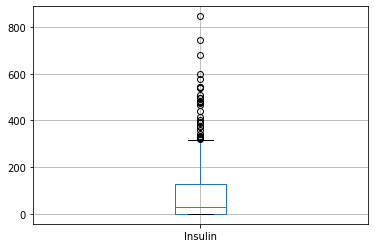

In [16]:
boxplot = diabetesDF.boxplot(column=['Insulin'])

In [17]:
#Skewed to towards 0 with very little data points 100+
#Check for how many data points above 100 to optimize 
#Max data between 0 to 20: 0-7 normal, 7-11: pre-diabetic, 11+: diabetic


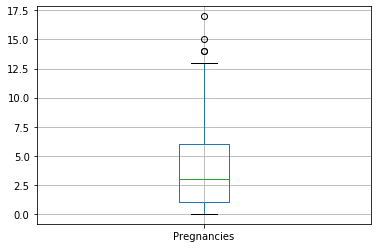

In [18]:
boxplot = diabetesDF.boxplot(column=['Pregnancies'])

In [19]:
#Skewed to the lower with maximum data between 1-3 births and a lot around 3-4 births

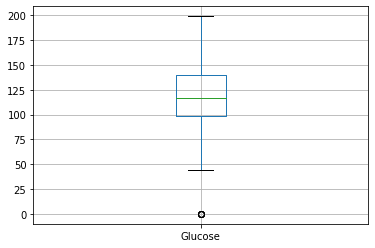

In [20]:
boxplot = diabetesDF.boxplot(column=['Glucose'])

In [21]:
#Good uniform distribution of data for glucose with ample highs and normals with maximum in the overlap - approx 100-140

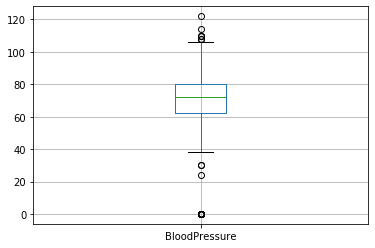

In [22]:
boxplot = diabetesDF.boxplot(column=['BloodPressure'])

In [23]:
#Uniform distribution of data with good numbers in 70-80 and the rest between 65-70.
#Most normal blood pressure. But check for co-relation between high and low bp

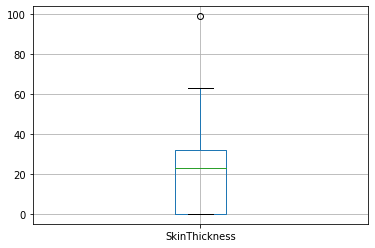

In [24]:
boxplot = diabetesDF.boxplot(column=['SkinThickness'])

In [25]:
#Skewed data towards lower spectrum with a lot of data between 25 to 33. This indicates normal to obese.
#Check if there is co-relation between BMI and Skinthickness and eliminate one.

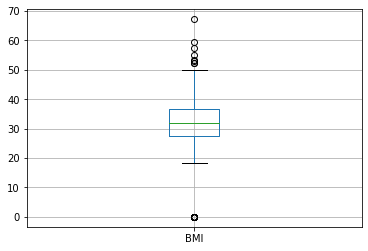

In [26]:
boxplot = diabetesDF.boxplot(column=['BMI'])

In [27]:
#Uniform distribution of data with maximum data around 28 to 35 which is around normal to obese.

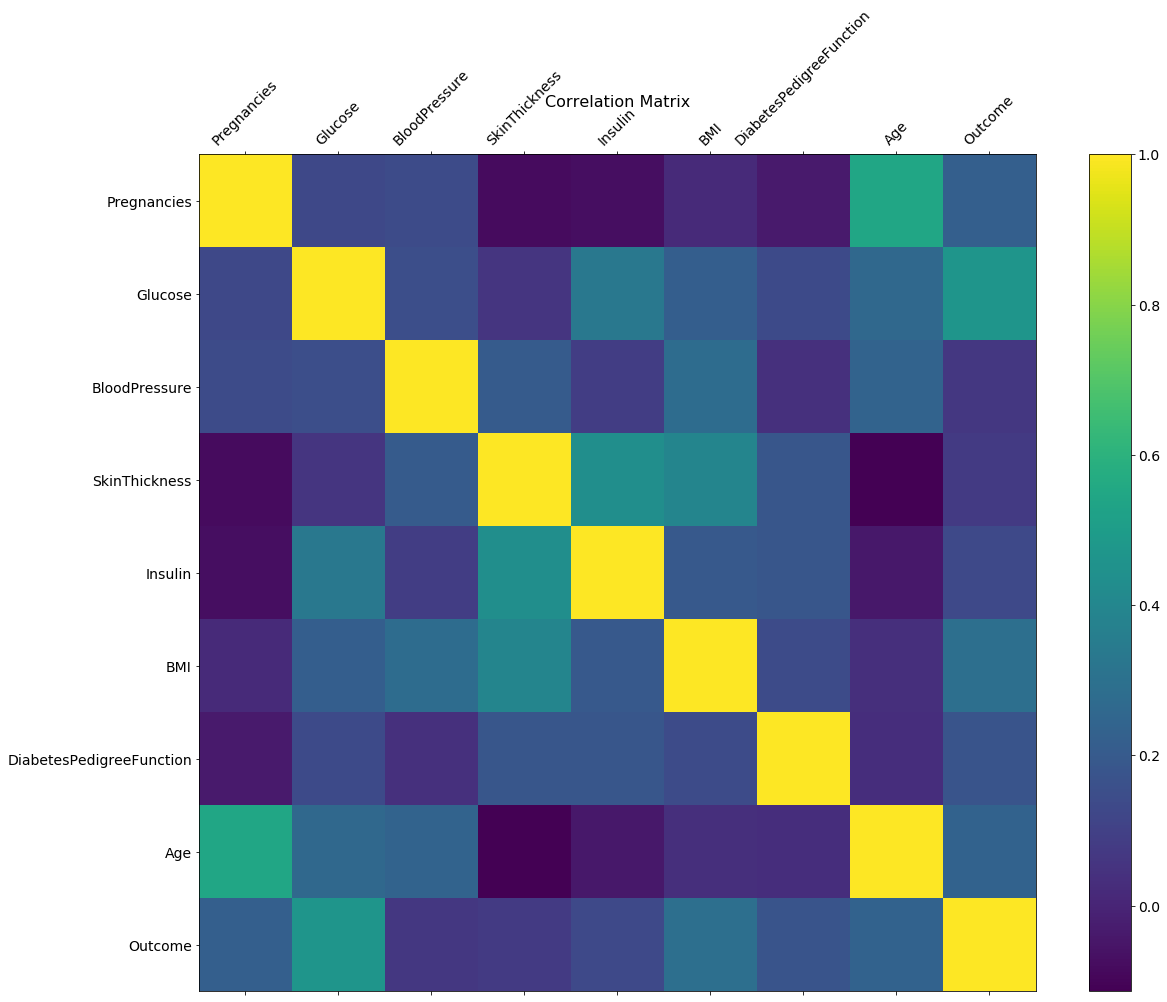

In [28]:
f = plt.figure(figsize=(19, 15))
plt.matshow(diabetesDF.corr(), fignum=f.number)
plt.xticks(range(diabetesDF.shape[1]), diabetesDF.columns, fontsize=14, rotation=45)
plt.yticks(range(diabetesDF.shape[1]), diabetesDF.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [29]:
#Strong co-relations exist between:
#Age and Pregnancies
#Glucose and target
#BMI and skinthickness - Check which is more accurate to target and eliminate the other
#Insulin and skin thickness - Check if skin thickness can be eliminated and insulin and BMI retained
#Moderate co-relation in insulin and glucose and hence outcome.
#Moderate co-relation between BMI and outcome

In [40]:
#Test the different models on the dataset
def test_models(X,y):
    #List of classifier models to test
    classifiers = {'Gradient Boosting Classifier':GradientBoostingClassifier(),'Adaptive Boosting Classifier':AdaBoostClassifier(),'Linear Discriminant Analysis':LinearDiscriminantAnalysis(),'Logistic Regression':LogisticRegression(),'Random Forest Classifier': RandomForestClassifier(),'K Nearest Neighbour':KNeighborsClassifier(8)}
    #Get the input variables and target variables for testing
    data_y = y
    data_X = X
    #Print the headers
    print(data_X.columns)
    log_cols = ["Classifier", "Accuracy","Precision Score","Recall Score","F1-Score","roc-auc_Score"]
    log = pd.DataFrame(columns=log_cols)
    #Filter the ignore warnings
    import warnings
    warnings.filterwarnings('ignore')
    #Random splitting to check over-fitting in testing the models
    rs = StratifiedShuffleSplit(n_splits=5, test_size=0.2,random_state=0)
    rs.get_n_splits(data_X,data_y)
    for Name,classify in classifiers.items():
        for train_index, test_index in rs.split(data_X,data_y):
            X,X_test = data_X.iloc[train_index], data_X.iloc[test_index]
            y,y_test = data_y.iloc[train_index], data_y.iloc[test_index]

            cls = classify
            cls =cls.fit(X,y)

            y_out = cls.predict(X_test)

            accuracy = m.accuracy_score(y_test,y_out)
            precision = m.precision_score(y_test,y_out,average='macro')
            recall = m.recall_score(y_test,y_out,average='macro')
            roc_auc = roc_auc_score(y_out,y_test)
            f1_score = m.f1_score(y_test,y_out,average='macro')
            #conf = metrics.confusion_matrix(y, y_out)

            log_entry = pd.DataFrame([[Name,accuracy,precision,recall,f1_score,roc_auc]], columns=log_cols)
            log = log.append(log_entry)
    print(log)
    plt.xlabel('AUC Score')
    plt.title('Classifier Score')
    sns.set_color_codes("muted")
    sns.barplot(x='roc-auc_Score', y='Classifier', data=log, color="g")  
    plt.show()


#Test  a specific model for performance
def modelfit(alg, X, y, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(X, y)
    #Predict training set:
    dtrain_predictions = alg.predict(X)
    dtrain_predprob = alg.predict_proba(X)[:,1]
    #Perform cross-validation:
    if performCV:
        cv_score = cross_validation.cross_val_score(alg, X, y, cv=cv_folds, scoring='roc_auc')
    f1_score = metrics.f1_score(y,dtrain_predictions,average='macro')
    conf = metrics.confusion_matrix(y, dtrain_predictions)
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : ", metrics.accuracy_score(y.values, dtrain_predictions))
    print ("AUC Score (Train): ", metrics.roc_auc_score(y, dtrain_predprob))
    print ("F1 Score: ", f1_score)
    print (conf)
    if performCV:
        print ("CV Score Mean : ",np.mean(cv_score), "Std: ", np.std(cv_score),"Min: ", np.min(cv_score), "Max: ", np.max(cv_score))   
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, X.columns).sort_values(ascending=False)
        fig, ax = plt.subplots(figsize=(15,10))
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')
         
    #Plot AUC-ROC curve
    range = [0.4, 0.3, 0.25, 0.2]
    for t in range:
        print ("With a threshold of: ",t)
        y_pred = np.copy(dtrain_predprob)
        threshold = t
        y_pred[dtrain_predprob >= threshold] = 1
        y_pred[dtrain_predprob < threshold] = 0
        print (confusion_matrix(y, y_pred))
        
        
from sklearn import metrics

def test_opt_model(model,X,y):
    #Predict with best model
    y_pred = model.predict(X)
    y_predprob = model.predict_proba(X)[:,1]

    #Score Training data
    f1_score = metrics.f1_score(y,y_pred,average='macro')
    conf = metrics.confusion_matrix(y, y_pred)
    
    #Print model report:
    print ("AUC Score (Train): %f", metrics.roc_auc_score(y, y_predprob))
    print ("F1 Score: ", f1_score)
    print (conf)

In [41]:
# Separating inputs and target variables
X = diabetesDF.drop(['Outcome'], axis=1)
y = diabetesDF['Outcome']

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')
                     Classifier  Accuracy  Precision Score  Recall Score  \
0  Gradient Boosting Classifier  0.818182         0.807971      0.783333   
0  Gradient Boosting Classifier  0.753247         0.731818      0.707778   
0  Gradient Boosting Classifier  0.792208         0.776973      0.754815   
0  Gradient Boosting Classifier  0.720779         0.691837      0.682778   
0  Gradient Boosting Classifier  0.785714         0.768244      0.749815   
0  Adaptive Boosting Classifier  0.798701         0.786035      0.759815   
0  Adaptive Boosting Classifier  0.727273         0.700893      0.675000   
0  Adaptive Boosting Classifier  0.753247         0.729560      0.716296   
0  Adaptive Boosting Classifier  0.714286         0.686296      0.686296   
0  Adaptive Boosting Classifier  0.779221         0.766369      0.732037   
0  Linear Disc

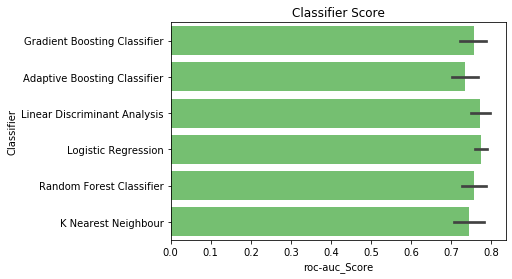

In [42]:
#Test for the best base model for our data set
test_models(X,y)

In [43]:
"""
FIRST HYPOTHESIS:
- Select one of BMI-SkinThickness-Insulin and see how it affects the models
- Bracket Insulin and BP and pregnancy [LDA performs better]
- Try over-sampling with Diabetic data : STILL PENDING

"""

'\nFIRST HYPOTHESIS:\n- Select one of BMI-SkinThickness-Insulin and see how it affects the models\n- Bracket Insulin and BP and pregnancy [LDA performs better]\n- Try over-sampling with Diabetic data : STILL PENDING\n\n'

In [44]:
#Re-loading data
diabetesDF = pd.read_csv('diabetes.csv')
diabetesDF.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [45]:
#sns.pairplot(diabetesDF , hue = 'Outcome')

In [46]:
#Categorizing Pregnancy and Insulin and BP
diabetesDF['InsulinHL'] = 0
diabetesDF.loc[(diabetesDF['Insulin'] >= 7) & (diabetesDF['Insulin'] <= 11),'InsulinHL'] = '2'
diabetesDF.loc[diabetesDF['Insulin'] > 11,'InsulinHL'] = '5'
diabetesDF.loc[diabetesDF['Insulin'] < 7,'InsulinHL'] = '0'
diabetesDF.drop(diabetesDF[['Insulin']],axis=1,inplace=True)
diabetesDF['InsulinHL']=diabetesDF["InsulinHL"].astype('int64')
diabetesDF.head()


diabetesDF['BP'] = 0
diabetesDF.loc[(diabetesDF['BloodPressure'] >= 80) & (diabetesDF['BloodPressure'] <= 95),'BP'] = '0'
diabetesDF.loc[diabetesDF['BloodPressure'] > 95,'BP'] = '1'
diabetesDF.loc[diabetesDF['BloodPressure'] < 80,'BP'] = '2'
diabetesDF.drop(diabetesDF[['BloodPressure']],axis=1,inplace=True)
diabetesDF['BP']=diabetesDF["BP"].astype('int64')
diabetesDF.head()


diabetesDF['Preg'] = 0
diabetesDF.loc[(diabetesDF['Pregnancies'] >= 2) & (diabetesDF['Pregnancies'] <= 4),'Preg'] = '0'
diabetesDF.loc[diabetesDF['Pregnancies'] > 4,'Preg'] = '2'
diabetesDF.loc[diabetesDF['Pregnancies'] < 2,'Preg'] = '1'
diabetesDF.drop(diabetesDF[['Pregnancies']],axis=1,inplace=True)
diabetesDF['Preg']=diabetesDF["Preg"].astype('int64')
diabetesDF.head()


,Glucose,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome,InsulinHL,BP,Preg
0,148,35,33.6,0.627,50,1,0,2,2
1,85,29,26.6,0.351,31,0,0,2,1
2,183,0,23.3,0.672,32,1,0,2,2
3,89,23,28.1,0.167,21,0,5,2,1
4,137,35,43.1,2.288,33,1,5,2,1


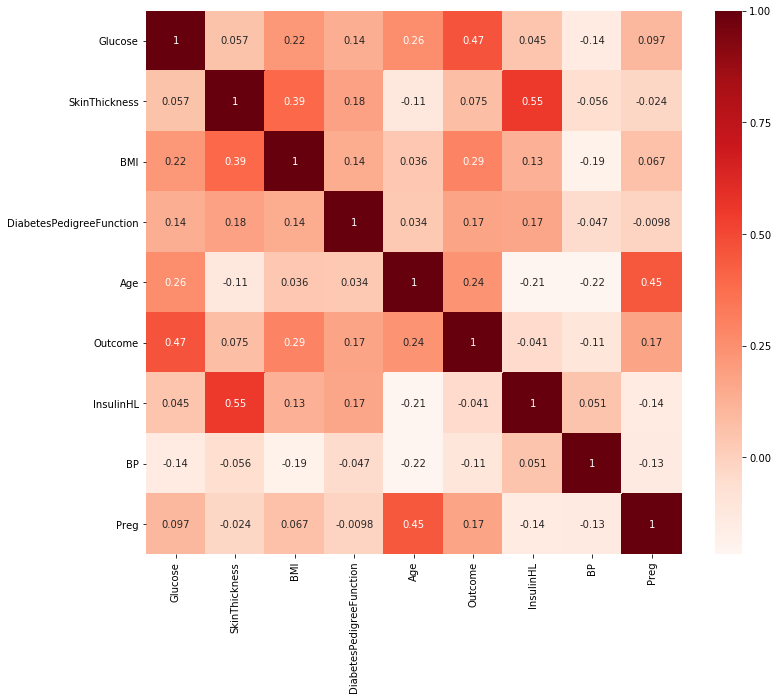

In [47]:
#Using Pearson Correlation to understand the new features
plt.figure(figsize=(12,10))
cor = diabetesDF.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [48]:
# Separating inputs and target variables
X = diabetesDF.drop(['Outcome'], axis=1)
y = diabetesDF['Outcome']
X.head()

,Glucose,SkinThickness,BMI,DiabetesPedigreeFunction,Age,InsulinHL,BP,Preg
0,148,35,33.6,0.627,50,0,2,2
1,85,29,26.6,0.351,31,0,2,1
2,183,0,23.3,0.672,32,0,2,2
3,89,23,28.1,0.167,21,5,2,1
4,137,35,43.1,2.288,33,5,2,1


In [49]:
#Dropping SkinThickness which is similar to BMI
X = X.drop(['SkinThickness'], axis=1)
#X = X.drop(['Age'], axis=1)

In [50]:
#scaler = MinMaxScaler()
#for columns in X:
#    X[columns] = scaler.fit_transform(X[columns].values.reshape(-1,1))

#Scaling helps models like K nearest Neighbour

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=19)


from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

#Feature importance
def features(model,X):
    coeff = list(model.coef_[0])
    labels = list(X)
    features = pd.DataFrame()
    features['Features'] = labels
    features['importance'] = coeff
    features.sort_values(by=['importance'], ascending=True, inplace=True)
    features['positive'] = features['importance'] > 0
    features.set_index('Features', inplace=True)
    features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
    plt.xlabel('Importance')

KNeighborsClassifier
****Results****
Accuracy: 72.0472%
Log Loss: 3.4500737587511927
SVC
****Results****
Accuracy: 67.3228%
Log Loss: 0.6142690761823866
NuSVC
****Results****
Accuracy: 66.1417%
Log Loss: 0.6122830011320277
DecisionTreeClassifier
****Results****
Accuracy: 68.1102%
Log Loss: 11.014334204676242
RandomForestClassifier
****Results****
Accuracy: 73.2283%
Log Loss: 0.7671120618801238
AdaBoostClassifier
****Results****
Accuracy: 78.3465%
Log Loss: 0.676371859607457
GradientBoostingClassifier
****Results****
Accuracy: 79.1339%
Log Loss: 0.5078058889009278
GaussianNB
****Results****
Accuracy: 73.2283%
Log Loss: 0.5444949690097256
LinearDiscriminantAnalysis
****Results****
Accuracy: 73.6220%
Log Loss: 0.49058439140118326
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 73.6220%
Log Loss: 0.533592091825235


Index(['Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'InsulinHL', 'BP',
       'Preg'],
      dtype='object')
                     Classifier  Accuracy  Precision Score  Recall Score  \
0  Gradient Boosting Classifier  0.805195         0.795455      0.764815   
0  Gradient Boosting Classifier  0.746753         0.723242      0.702778   
0  Gradient Boosting Classifier  0.811688         0.798867      0.778333   
0  Gradient Boosting Classifier  0.753247         0.729038      0.720556   
0  Gradient Boosting Classifier  0.779221         0.763636      0.736296   
0  Adaptive Boosting Classifier  0.798701         0.789126      0.755556   
0  Adaptive Boosting Classifier  0.753247         0.731818      0.707778   
0  Adaptive Boosting Classifier  0.759740         0.736735      0.725556   
0  Adaptive Boosting Classifier  0.701299         0.673469      0.676296   
0  Adaptive Boosting Classifier  0.831169         0.823470      0.797593   
0  Linear Discriminant Analysis  0.779221      

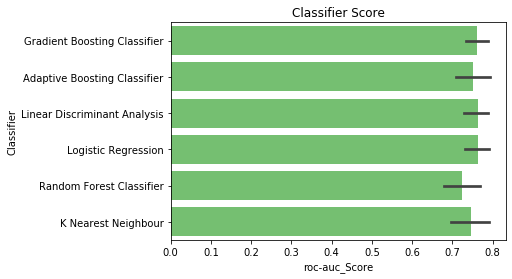

In [52]:
#Test for the best base model for our data set
test_models(X,y)

In [53]:
#Split into Training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Gradient Boosting algorithm is best suited. Lets tune the hyper-parameters
#Choose all predictors except target & IDcols
"""
target = 'Outcome'
predictors = [x for x in X_train.columns if x not in [target]]
param_test1 = {'n_estimators':range(30,101,5)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.02, min_samples_split=500,min_samples_leaf=50,max_depth=8,subsample=0.8,random_state=10), 
param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_train,y_train)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_
"""
model = GradientBoostingClassifier(n_estimators= 40,learning_rate=0.1, min_samples_split=200,min_samples_leaf=50,max_depth=4,subsample=0.8,random_state=10)
model = model.fit(X_train, y_train)

In [54]:
test_opt_model(model,X_test,y_test)

AUC Score (Train): %f 0.8123048668503214
F1 Score:  0.7493839215139257
[[83 16]
 [19 36]]
